Name: plot_td2m.ipynb

Author: Robert M. Frost

NOAA Global Systems Laboratory

Created: 01 July 2023

Purpose: Plot dew point and wind barb comparisons of SRW output

In [10]:
from plotting_functions import read_grib
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cpf
import seaborn

Read in dew point data

In [11]:
# hour of interest
hr = 18
# directory where hrrr grib data are located
dgrib_h = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2019052000_3km_hrrrphys/2019052000/postprd/"
# directory where rap grib data are located
dgrib_r = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2019052000_3km_rapphys/2019052000/postprd/"
# read in data
td2m_h, lat, lon, valid_date = read_grib(hr, dgrib_h, "natlev", 1358)
td2m_r = read_grib(hr, dgrib_r, "natlev", 1358, array_only=True)
# convert to fahrenheit (superior unit of temperature)
td2m_h = (td2m_h.values - 273.15) * (9/5) + 32
td2m_r = (td2m_r.values - 273.15) * (9/5) + 32

Reading in grib output
Reading in grib output


Read in 10m wind

In [12]:
u10_h = read_grib(hr, dgrib_h, "natlev", 1364, array_only=True).values
v10_h = read_grib(hr, dgrib_h, "natlev", 1365, array_only=True).values
u10_r = read_grib(hr, dgrib_r, "natlev", 1364, array_only=True).values
v10_r = read_grib(hr, dgrib_r, "natlev", 1365, array_only=True).values

Reading in grib output
Reading in grib output
Reading in grib output
Reading in grib output


Plot dew point comparison

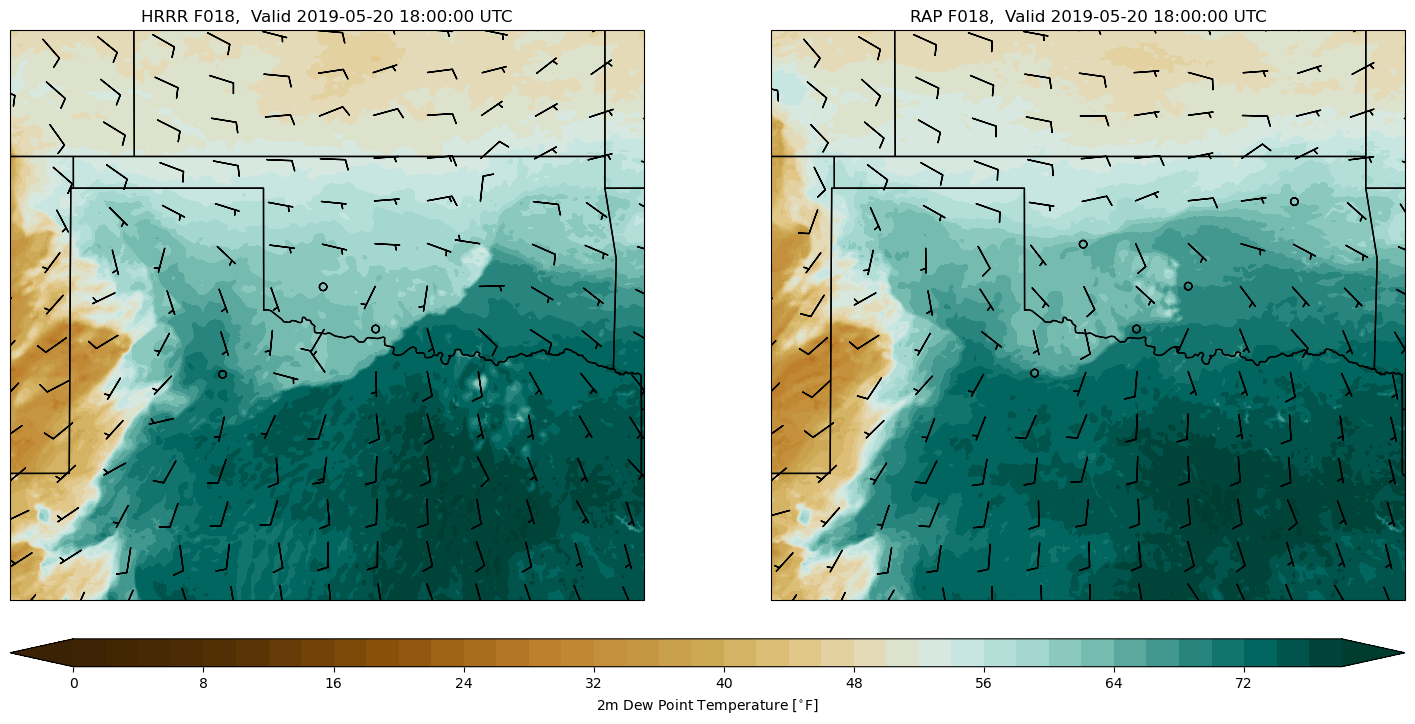

In [13]:
# dew point colorbar
import matplotlib.colors as colors
a = np.array([0,10,20,30,40,45,50,55,60,65,70,75,80])
# Normalize the bin between 0 and 1 (uneven bins are important here)
norm = [(float(i)-min(a))/(max(a)-min(a)) for i in a]
# Color tuple for every bin
C = np.array([[59,34,4],
            [84,48,5],
            [140,82,10],
            [191,129,45],
            [204,168,84],
            [223,194,125],
            [230,217,181],
            [211,235,231],
            [169,219,211],
            [114,184,173],
            [49,140,133],
            [1,102,95],
            [0,60,48],
            [0,41,33]])
# Create a tuple for every color indicating the normalized position on the colormap and the assigned color.
COLORS = []
for i, n in enumerate(norm):
    COLORS.append((n, np.array(C[i])/255.))
# Create the colormap
cmap = colors.LinearSegmentedColormap.from_list("dewpoint", COLORS)

# Define your custom colorbar bounds
cbar_min = 0
cbar_max = 80

clevs = np.arange(cbar_min, cbar_max, 2)

colors = cmap

# create plot
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18,10))
# mapping
plt_area = [-104, -94, 30, 39] # W, E, S, N
for i, iax in enumerate(ax):
    iax.coastlines()
    iax.add_feature(cpf.BORDERS)
    iax.add_feature(cpf.STATES)
    iax.set_extent(plt_area)
# plot
c0 = ax[0].contourf(lon, lat, td2m_h, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors,
                    extend="both")
c1 = ax[1].contourf(lon, lat, td2m_r, clevs,
                    transform=ccrs.PlateCarree(), 
                    cmap=colors,
                    extend="both")

# pretty up
ax[0].set_title(f"HRRR F0{hr},  Valid {valid_date} UTC")
ax[1].set_title(f"RAP F0{hr},  Valid {valid_date} UTC")

# Add colorbar
cbar = fig.colorbar(c1, ax=ax, orientation='horizontal', extend=True, pad=0.05, aspect=50)
cbar.set_label('2m Dew Point Temperature [$^{\circ}$F]')

# Wind barbs
spacing=25 #barbspacing (smaller if zoomed in)
ax[0].barbs(lon[::spacing,::spacing], lat[::spacing,::spacing],
            u10_h[::spacing,::spacing], v10_h[::spacing,::spacing], 
            length=6)
ax[1].barbs(lon[::spacing,::spacing], lat[::spacing,::spacing],
            u10_r[::spacing,::spacing], v10_r[::spacing,::spacing], 
            length=6)

plt.savefig(f"/scratch2/BMC/fv3lam/Robby.Frost/figures/20190520/td2m/td2m_sidebyside_f{hr}.png")
plt.show()
plt.close()

td2m difference plot

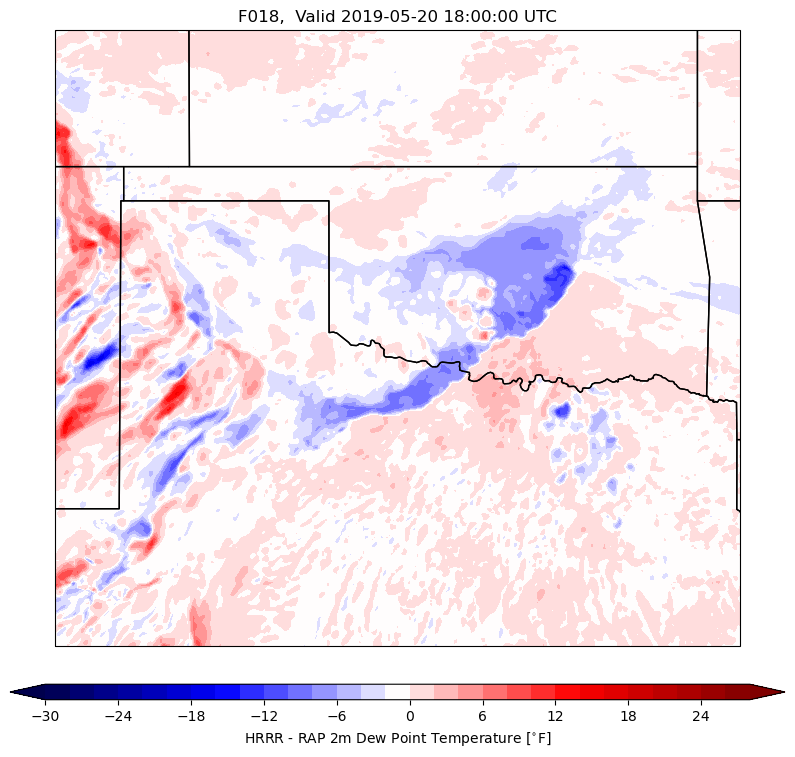

In [14]:
# Define your custom colorbar bounds
cbar_min = -30
cbar_max = 30

clevs = np.arange(cbar_min, cbar_max, 2)

colors = seaborn.color_palette("seismic", as_cmap=True)

# create plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10,10))
# mapping
plt_area = [-104, -94, 30, 39] # W, E, S, N
ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)
ax.set_extent(plt_area)
# plot
c0 = ax.contourf(lon, lat, td2m_h - td2m_r, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors,
                    extend="both")

# pretty up
ax.set_title(f"F0{hr},  Valid {valid_date} UTC")

# Add colorbar
cbar = fig.colorbar(c0, ax=ax, orientation='horizontal', extend=True, pad=0.05, aspect=50)
cbar.set_label('HRRR - RAP 2m Dew Point Temperature [$^{\circ}$F]')

plt.savefig(f"/scratch2/BMC/fv3lam/Robby.Frost/figures/20190520/td2m/td2m_diff_f{hr}.png")
plt.show()
plt.close()